In [1]:
from fastai.vision.all import *
from torchvision.models import *

from utils import *
import sys

import pickle
import dill

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
with open('models/M3_RN_ds3.pickle', 'rb') as f:
    learn = pickle.load(f)
    
learn = dill.loads(learn)

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#this function is not necessary and unfortunately sometimes has a bug. 
#But when it works, it shows relatively well the examples that the model predicts.
learn.show_results()

In [4]:
path_wiki = 'data/watches/ds3_crown/cleandata.csv'
path_imdb = 'data/watches/ds3_crown/images/'
img_size  = 255

In [5]:
df = pd.read_csv(path_wiki, index_col=0)
df_train, df_test = train_test_split(df, test_size=0.1, random_state=12)
#split the data again to a smaller subset so we don't have to calculate everything and can visualize it better
df_train_1, df_train_2 = train_test_split(df_train, test_size=0.1, random_state=12)
df_test_1, df_test_2 = train_test_split(df_test, test_size=0.1, random_state=12)

In [6]:
def get_predictions(df, image_path):
    example_test_watches = df["image_name"].values 
    example_test_price = df["price"].values 

    predictions = []
    for watch in example_test_watches:
        predictions.append(int(learn.predict(str(image_path) + "/" + watch)[1]))
        
    return predictions, example_test_price

In [7]:
%%capture
### TIME INFORMATION: needs 3,41min on M1
y_pred, y_test = get_predictions(df_test_2, path_imdb)
y_pred_train, y_train = get_predictions(df_train_2, path_imdb)

In [9]:
print(f"The R2 score of the model on the Test Data is: {r2_score(y_test, y_pred)}")
print(f"The R2 score of the model on the Train Data is: {r2_score(y_train, y_pred_train)}")

The R2 score of the model on the Test Data is: 0.5284755886062014
The R2 score of the model on the Train Data is: 0.6531303511577198


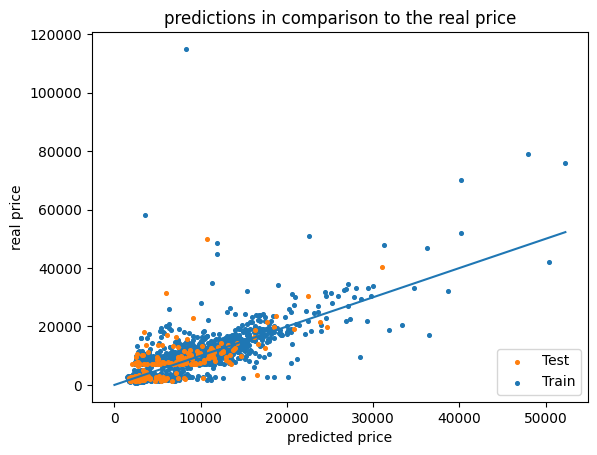

In [10]:
fig, ax = plt.subplots()

train = ax.scatter(y_pred_train, y_train, s=7, label ="Train")
test = ax.scatter(y_pred, y_test, s=7, label= "Test")

ax.plot([0,max(y_pred_train)], [0,max(y_pred_train)])
ax.set_ylabel('real price')
ax.set_xlabel('predicted price')
ax.set_title('predictions in comparison to the real price')

ax.legend(handles=[test, train], loc='lower right')

plt.show()

## Load and Test DS 2

In [11]:
ds2_path_wiki = 'data/watches/ds2_marc/cleandata.csv'
ds2_path_imdb = 'data/watches/ds2_marc/images/'
df_ds2 = pd.read_csv(ds2_path_wiki, index_col=0)

In [12]:
%%capture
### TIME INFORMATION: needs 30s on M1
y_pred_ds2, all_label_ds2 = get_predictions(df_ds2, ds2_path_imdb)

## Finding the watch that looks the most expensive but is actually cheap. 

In [13]:
#get the real price by predicted price ratio
def get_price_look_ratio(array1, array2):
    filtered_array1 = []
    filtered_array2 = []
    
    ratio = []
    
    for i in range(len(array1)):
        #picture_name = df.iloc[i]["image_name"]
        predicted_price = array1[i]
        real_price = array2[i]
        
        ratio.append(predicted_price/real_price)
    
    return ratio

In [21]:
def print_best_watch(prediction, labels, df):
    ratio = get_price_look_ratio(prediction, labels)
    max_index = ratio.index(max(ratio))
    picture_name = df.iloc[max_index]["image_name"]
    print(f"With picture: {picture_name} the model predicts a price of {prediction[max_index]}$ at a real price of {labels[max_index]}$")

In [22]:
print_best_watch(y_pred_ds2, all_label_ds2, df_ds2)

With picture: MG5407S.jpg the model predicts a price of 18401$ at a real price of 84.33$


In [23]:
print_best_watch(y_pred, y_test, df_test)

With picture: 10-10-TAG-CL793S.jpg the model predicts a price of 6710$ at a real price of 1200.0$


In [24]:
print_best_watch(y_pred_train, y_train, df_train)

With picture: 10-10-ROL-U26YLC.jpg the model predicts a price of 11139$ at a real price of 1535.0$


From the previous output, it appears that the watch with the filename MG4243S.jpg is valued at 1.4 million dollar although it costs only 416.32 dolllar.

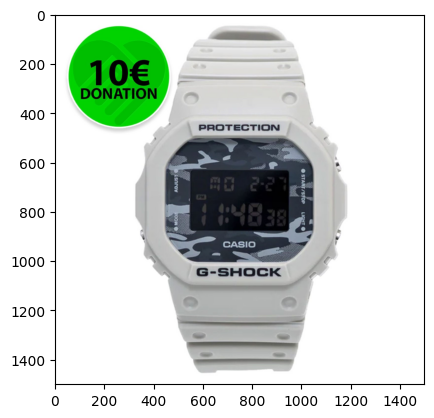

In [32]:
plt.imshow(mpimg.imread(ds2_path_imdb + '/MG5407S.jpg'))

In [25]:
print(f"The R2 score on not filtered Marc Gebauer Data is: {r2_score(all_label_ds2, y_pred_ds2)}")

The R2 score on not filtered Marc Gebauer Data is: -0.05188201206638232


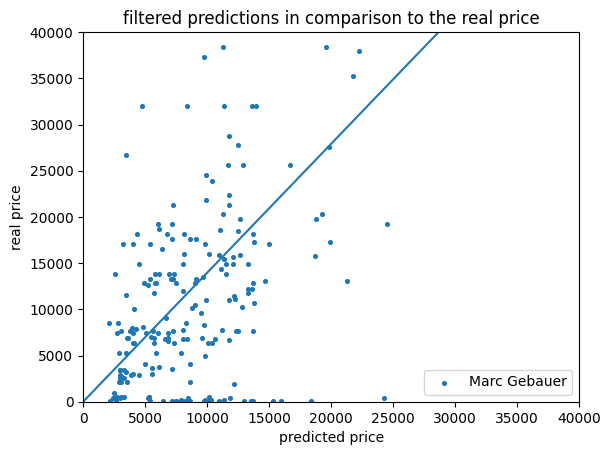

In [27]:
fig, ax = plt.subplots()

test = ax.scatter(y_pred_ds2, all_label_ds2, s=7, label ="Marc Gebauer")

ax.plot([0,max(y_pred)], [0,max(y_pred_ds2)])
ax.set_ylabel('real price')
ax.set_xlabel('predicted price')
ax.set_title('filtered predictions in comparison to the real price')

ax.legend(handles=[test], loc='lower right')
ax.set_ylim(0, 40000)  
ax.set_xlim(0, 40000)  

plt.show()